<a href="https://colab.research.google.com/github/arshiya07/SupervisedLearning/blob/main/CarPrice(Supervised_Learning_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('/content/train-data.csv',index_col=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(6019, 13)

In [5]:
#Count of null values in each column
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
#Removing column with more than 86% of null values
df1 = df.drop('New_Price',axis=1)

In [7]:
df1.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
df1.shape

(6019, 12)

In [9]:
#Removing all the rows with null values
df2= df1.dropna(axis=0)

In [10]:
df2.shape

(5975, 12)

In [11]:
df2.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [12]:
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [13]:
#Determining the age of car
df2['Year']  = 2021 - df2['Year']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#Function to retain just the values which can be converted into numerical data
#as the Mileage column consists of more than one type of unit
def convert_mileage(x):
  return float(x.split(' ')[0])
  

In [15]:
#Passing on the values of Mileage column to the function as arguments
df2['Mileage'] = df2['Mileage'].apply(convert_mileage)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df2['Engine']=df2['Engine'].str.replace('CC','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df2['Power'] = df2['Power'].str.replace('bhp','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df3 = df2[~(df2['Power']=='null ')]


In [19]:
df3['Power'] = df3['Power'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,11,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,6,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,10,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,9,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,8,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [21]:
df3.dtypes


Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [22]:
#one hot encoding
dx = pd.DataFrame({'a': ['x','x','y','y','z','z']})
dx

,a
0,x
1,x
2,y
3,y
4,z
5,z


In [23]:
pd.get_dummies(dx['a'])

,x,y,z
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1


In [24]:
df3['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [25]:
df3['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [26]:
df3['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [27]:
df_f=pd.get_dummies(df3['Fuel_Type'])
df_t=pd.get_dummies(df3['Transmission'])
df_o=pd.get_dummies(df3['Owner_Type'])

In [28]:
#Concatenation of two dataframes
df4 = pd.concat((df3,df_f,df_t,df_o),axis=1)

In [29]:
df4.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,Maruti Wagon R LXI CNG,Mumbai,11,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,6,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0
2,Honda Jazz V,Chennai,10,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,9,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,8,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,1,0,0,0,1,0


In [30]:
#Removing columns which are already hot encoded 
df4 = df4.drop(['Fuel_Type','Transmission','Owner_Type'], axis = 1)

In [31]:
df4.head()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,Maruti Wagon R LXI CNG,Mumbai,11,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,6,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0
2,Honda Jazz V,Chennai,10,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,9,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,1,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,8,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,1,0,0,0,1,0


In [32]:
df4.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
CNG                    uint8
Diesel                 uint8
LPG                    uint8
Petrol                 uint8
Automatic              uint8
Manual                 uint8
First                  uint8
Fourth & Above         uint8
Second                 uint8
Third                  uint8
dtype: object

In [33]:
df4['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [34]:
df4['Location'].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

In [35]:
df_l=pd.get_dummies(df4['Location'])
df4 = pd.concat((df4,df_l),axis = 1)

In [36]:
df4 = df4.drop(['Location'],axis=1)

In [37]:
df4.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,Maruti Wagon R LXI CNG,11,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Hyundai Creta 1.6 CRDi SX Option,6,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Honda Jazz V,10,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,9,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,8,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [38]:
len(df4['Name'].unique())

1811

In [39]:
#Splitting the car names to simplify classification
#Example
k = 'Maruti Wagon R LXI CNG'
car = k.split(' ')[:2]
sep=' '
sep.join(car)

'Maruti Wagon'

In [40]:
def car_name(x):
  car = x.split(' ')[0:2]
  sep = ' '
  return sep.join(car)

In [41]:
df4['Name'] = df4['Name'].apply(car_name)

In [42]:
df4.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,Maruti Wagon,11,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Hyundai Creta,6,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Honda Jazz,10,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Maruti Ertiga,9,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Audi A4,8,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
car_counts = df4['Name'].value_counts()
car_less_than_15 = car_counts[car_counts<=15]

In [44]:
#Function to filter out the cars with less than 15 models
def filter_cars(x):
  if x in car_less_than_15:
    return False
  else:
    return True

In [45]:
df5 = df4[df4['Name'].apply(filter_cars)]

In [46]:
df5['Name'].value_counts()

Maruti Swift     327
Honda City       265
Hyundai i20      247
Hyundai Verna    170
Toyota Innova    164
                ... 
Maruti Eeco       18
Maruti A-Star     17
Hyundai Santa     17
Honda Mobilio     16
Tata Manza        16
Name: Name, Length: 83, dtype: int64

In [47]:
df5['Name']

0         Maruti Wagon
1        Hyundai Creta
2           Honda Jazz
3        Maruti Ertiga
4              Audi A4
             ...      
6014      Maruti Swift
6015     Hyundai Xcent
6016     Mahindra Xylo
6017      Maruti Wagon
6018    Chevrolet Beat
Name: Name, Length: 5241, dtype: object

In [48]:
# str.strip() function is used to remove leading and trailing characters
df5['Name']= df5['Name'].str.strip()
#Converting all names to lowercase to avoid discrepancy
df5['Name']= df5['Name'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [49]:
df5['Name']

0         maruti wagon
1        hyundai creta
2           honda jazz
3        maruti ertiga
4              audi a4
             ...      
6014      maruti swift
6015     hyundai xcent
6016     mahindra xylo
6017      maruti wagon
6018    chevrolet beat
Name: Name, Length: 5241, dtype: object

In [50]:
#one hot encoding for name column
df_n = pd.get_dummies(df5['Name'])

In [51]:
df6 = pd.concat((df5,df_n),axis=1)

In [52]:
df6 = df6.drop('Name',axis=1)

In [53]:
x= df6.drop('Price',axis=1).values
y= df6[['Price']].values

In [54]:
#Importing the train_test_split model from libraby of scikit-learn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

In [55]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

In [56]:
lmodel.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytrain,lmodel.predict(xtrain)))
print(mean_absolute_error(ytest,lmodel.predict(xtest)))

2.1789458879423504
2.344418800789195


In [58]:
df6.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,audi a4,audi a6,audi q3,audi q5,audi q7,bmw 3,bmw 5,bmw x1,bmw x5,chevrolet beat,chevrolet cruze,ford ecosport,...,maruti celerio,maruti ciaz,maruti dzire,maruti eeco,maruti ertiga,maruti omni,maruti ritz,maruti swift,maruti sx4,maruti vitara,maruti wagon,maruti zen,mercedes-benz e-class,mercedes-benz gla,mercedes-benz m-class,mercedes-benz new,mini cooper,mitsubishi pajero,nissan micra,nissan sunny,nissan terrano,renault duster,renault kwid,skoda laura,skoda octavia,skoda rapid,skoda superb,tata indica,tata indigo,tata manza,tata nano,tata zest,toyota corolla,toyota etios,toyota fortuner,toyota innova,volkswagen ameo,volkswagen jetta,volkswagen polo,volkswagen vento
0,11,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
print(df6['Mileage'].max(),df6['Mileage'].min(),df6['Mileage'].mean())
print(df6['Engine'].max(),df6['Engine'].min(),df6['Engine'].mean())
print(df6['Power'].max(),df6['Power'].min(),df6['Power'].mean())

33.54 0.0 18.51843350505634
4367.0 624.0 1583.5430261400495
335.3 34.2 109.39659606945145


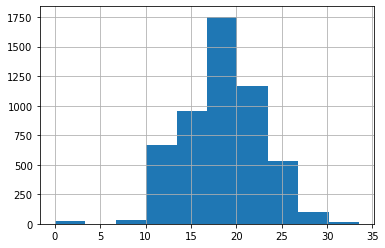

In [60]:
df6['Mileage'].hist()

In [61]:
#Calculating mean and standard deviation of values in Engine column
m = df6['Engine'].mean()
st = df6['Engine'].std()
print(m-2*st)
print(m+2*st)


473.87585970438295
2693.210192575716


In [62]:
#values within two standard deviations account for about 95% of the set
df7 = df6[(df6['Engine'] >= (m-2*st)) & (df6['Engine'] <= (m+2*st))]


In [63]:
x= df7.drop('Price',axis=1).values
y= df7[['Price']].values

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

lmodel.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#decrement in error 
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytrain,lmodel.predict(xtrain)))
print(mean_absolute_error(ytest,lmodel.predict(xtest)))

1.6437792040149626
1.6620927197060953


In [66]:
m = df6['Power'].mean()
st = df6['Power'].std()
print(m - 2*st)
print(m + 2*st)

16.14612080052447
202.64707133837842


In [67]:
df8 = df6[(df6['Power'] >= (m-2*st)) & (df6['Power'] <= (m+2*st))]

In [68]:
x = df8.drop('Price',axis=1)
y = df8[['Price']]

In [69]:
print(y)

      Price
0      1.75
1     12.50
2      4.50
3      6.00
4     17.74
...     ...
6014   4.75
6015   4.00
6016   2.90
6017   2.65
6018   2.50

[5031 rows x 1 columns]


In [70]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

lmodel.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytrain,lmodel.predict(xtrain)))
print(mean_absolute_error(ytest,lmodel.predict(xtest)))

1.6832436904831989
1.7314790710573646


In [72]:
import numpy as np
ytest_pred = lmodel.predict(xtest)

In [73]:
print(df6.shape)
print(df7.shape)
print(df8.shape)

(5241, 110)
(4906, 110)
(5031, 110)


In [74]:
len(df8.columns)-1

109

In [75]:
xtrain.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'CNG', 'Diesel', 'LPG', 'Petrol',
       ...
       'tata nano', 'tata zest', 'toyota corolla', 'toyota etios',
       'toyota fortuner', 'toyota innova', 'volkswagen ameo',
       'volkswagen jetta', 'volkswagen polo', 'volkswagen vento'],
      dtype='object', length=109)

In [76]:
#Creating a zero ndarray of dimension = columns in xtrain
input = np.zeros(len(xtrain.columns))
input

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [77]:
#Giving user defined input
year = 6
kms = 56000
mig = 16.0
eng = 1000
pwr = 78.8
seats = 5

fuel_type = 'Diesel'
transmission = 'Automatic'
owner = 'First'
city = 'Delhi'
name = 'audi a4'

input[0] = year
input[1] = kms
input[2] = mig
input[3] = eng
input[4] = pwr
input[5] = seats

idf = np.where(xtrain.columns == fuel_type)[0][0]
idt = np.where(xtrain.columns == transmission)[0][0]
ido = np.where(xtrain.columns == owner)[0][0]
idc = np.where(xtrain.columns == city)[0][0]
idd = np.where(xtrain.columns == name)[0][0]


input[idf] = 1
input[idt] = 1
input[ido] = 1
input[idc] = 1
input[idd] = 1

In [78]:
#Predicting the price or label of the car with user defined features
print(lmodel.predict([input])[0])

[17.31114414]


In [79]:
#Save model for deployment

import pickle
with open('car_price.pickle','wb') as f:
  pickle.dump(lmodel,f)

In [80]:
import json
columns = {'data_columns': [col.lower() for col in xtrain.columns]}

with open("columns.json","w") as f:
  f.write(json.dumps(columns))